### Name : Mandar Gurjar
### Roll No : IT1 - 35
### Practical : 1
### Aim : Predicting the placement according to cgpa using Linear Regression

In [5]:
##Generating random data of fields cgpa package_pa and year_of_placement

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 rows of data
n = 1000

# Generate data for the three attributes
student_cgpa = np.round(np.random.uniform(6.0, 10.0, n), 2)  # CGPA between 6.0 and 10.0
student_package_pa = np.round(np.random.uniform(3.0, 25.0, n), 2)  # Package in LPA between 3.0 and 25.0
year_of_placement = np.random.choice([2016,2017,2018,2019, 2020, 2021, 2022, 2023], n)  # Random years between 2016 and 2023

# Create a DataFrame
data = pd.DataFrame({
    'student_cgpa': student_cgpa,
    'student_package_pa': student_package_pa,
    'year_of_placement': year_of_placement
})

# Save the DataFrame to a CSV file
data.to_csv('student_data.csv', index=False)

# Display the first few rows of the generated data
print(data.head())


   student_cgpa  student_package_pa  year_of_placement
0          7.50                7.07               2019
1          9.80               14.92               2022
2          8.93               22.20               2018
3          8.39               19.11               2022
4          6.62               20.74               2019


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Features and target variable
X = data[['student_cgpa', 'year_of_placement']]
y = data['student_package_pa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=347)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Function to predict package based on CGPA and year of placement
def predict_package(cgpa, year):
    # Create a DataFrame with the same column names as used for training
    input_df = pd.DataFrame([[cgpa, year]], columns=['student_cgpa', 'year_of_placement'])
    return model.predict(input_df)[0]

# Get input from user
try:
    cgpa_input = float(input("Enter the CGPA (e.g., 8.5): "))
    year_input = int(input("Enter the year of placement (e.g., 2023): "))
    
    # Predict the package
    predicted_package = predict_package(cgpa_input, year_input)
    print(f'Predicted package for CGPA {cgpa_input} and year {year_input}: {predicted_package:.2f} LPA')
except ValueError:
    print("Invalid input. Please enter numeric values for CGPA and year.")


Mean Squared Error: 43.93
Enter the CGPA (e.g., 8.5): 9
Enter the year of placement (e.g., 2023): 2025
Predicted package for CGPA 9.0 and year 2025: 14.84 LPA


# Conclusion

In this practical, we implemented a linear regression model to predict the package (in LPA) a student might receive based on their CGPA and year of placement. Below, I summarize the key steps and findings from our analysis.

## Steps Performed

1. **Data Generation**:
   - We generated a synthetic dataset with 1000 rows. The dataset included three features:
     - `student_cgpa`: CGPA of the student (ranging from 6.0 to 10.0).
     - `student_package_pa`: Package in LPA that the student might receive (ranging from 3.0 to 25.0).
     - `year_of_placement`: The year in which the student was placed (ranging from 2016 to 2023).
   - The generated data was saved to a CSV file named `student_data.csv`.

2. **Data Loading and Preparation**:
   - We loaded the dataset from the CSV file using pandas.
   - The features (`student_cgpa` and `year_of_placement`) and the target variable (`student_package_pa`) were defined.
   - The data was split into training and testing sets to evaluate the model's performance.

3. **Model Training**:
   - A linear regression model was trained using the training data.
   - We used the `LinearRegression` class from `scikit-learn` to fit the model on the training data.

4. **Model Evaluation**:
   - The model's performance was evaluated using the Mean Squared Error (MSE) on the test data.
   - The MSE value provided an indication of how well the model performed on unseen data.

5. **Prediction**:
   - We implemented a function to predict the package based on user input for CGPA and year of placement.
   - The function uses the trained model to estimate the package and display the result.

## Findings

- **Model Performance**: The Mean Squared Error (MSE) computed on the test data provides an understanding of the prediction accuracy. A lower MSE indicates better performance of the model.

- **Predictive Capability**: The linear regression model allows us to estimate the package based on CGPA and the year of placement. By providing input values, users can obtain predictions that offer insights into potential packages a student might receive.

## Conclusion

The practical demonstrated how linear regression can be effectively used to model and predict continuous variables based on input features. By generating synthetic data and applying linear regression, we were able to:
- Create a dataset that simulates real-world scenarios.
- Train a regression model to understand the relationship between CGPA, year of placement, and package.
- Evaluate and use the model to make predictions based on user inputs.

Overall, the experiment illustrates the application of linear regression in predicting outcomes and how it can be applied to various real-world problems.


Mean Squared Error: 41.64


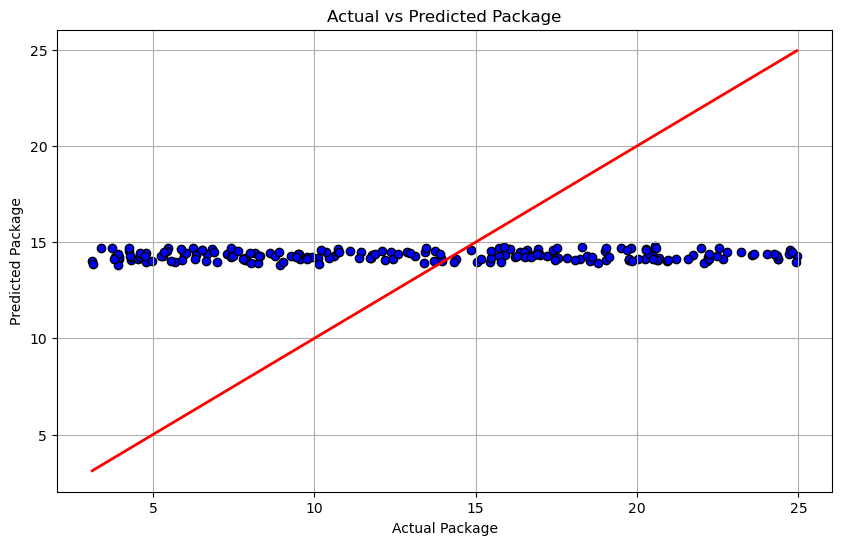

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Features and target variable
X = data[['student_cgpa', 'year_of_placement']]
y = data['student_package_pa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Package')
plt.ylabel('Predicted Package')
plt.title('Actual vs Predicted Package')
plt.grid(True)
plt.show()
